In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
payment = df[df['type']=='PAYMENT']
payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [3]:
payment.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.0,0.0,0,0


In [6]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2151495 entries, 0 to 6362319
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 197.0+ MB


In [4]:
payment.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,0.0,0.0,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,0.0,0.0,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,0.0,0.0,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,0.0,0.0,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,0.0,0.0,0.0,0.0


In [7]:
payment.shape

(2151495, 11)

C:\Users\ethan\AppData\Local\Temp\ipykernel_37160\1811141200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=payment, x='isFraud', palette='pastel')


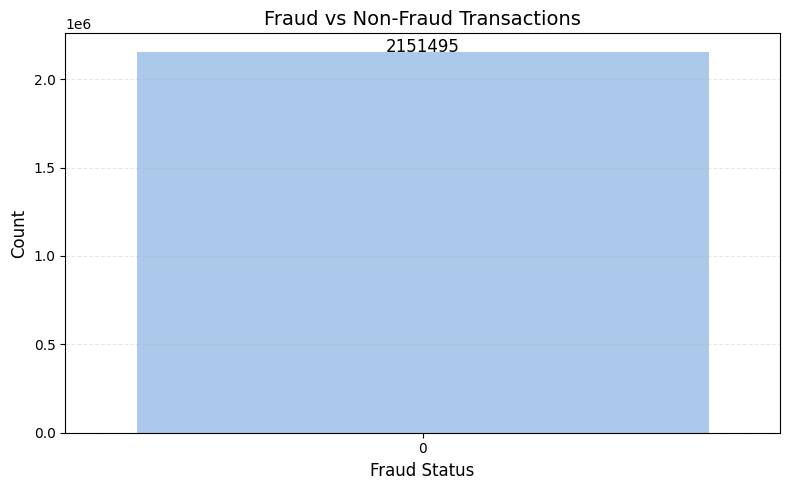

In [8]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=payment, x='isFraud', palette='pastel')

# Add the numbers manually using plt.text
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 100, f'{count}', ha='center', color='black', fontsize=12)

# Set titles and labels
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14, color='black')
plt.xlabel('Fraud Status', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()